### Importing libraries 

In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



### Exploring and cleaning the data 

In [3]:
df = pd.read_csv('developer_dataset.csv')


C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\3387839391.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


#### Checking columns' names 

In [10]:
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


#### Checking number of records in each column

In [15]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

#### Summarising the data to understand more about averages, max, min, number of missing data and more

In [19]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


#### Checking the percentage of missing data in each column 

In [50]:
maxRows = df['RespondentID'].count()

columns_count = round((1 - df.count() / maxRows),2) * 100

print('% Missing Data:')

print(columns_count)

% Missing Data:
RespondentID               0.0
Year                       0.0
Country                    0.0
Employment                 2.0
UndergradMajor            11.0
DevType                   10.0
LanguageWorkedWith         8.0
LanguageDesireNextYear    14.0
DatabaseWorkedWith        23.0
DatabaseDesireNextYear    33.0
PlatformWorkedWith        18.0
PlatformDesireNextYear    23.0
Hobbyist                  39.0
OrgSize                   51.0
YearsCodePro              15.0
JobSeek                   46.0
ConvertedComp             18.0
WorkWeekHrs               54.0
NEWJobHunt                83.0
NEWJobHuntResearch        83.0
NEWLearn                  78.0
dtype: float64


Columns 'NEWJobHunt', 'NEWJobHuntResearch' and 'NEWLearn' will be delited as they have over 60% of missing data.

#### Deleting the columns 

In [ ]:
df.drop([ 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis = 1, inplace = True)

#### Cleaning to analyze 

The first analysis will be on the distribution of developer types by country. 
But both the 'Employment' and 'DevType' columns have less than 10% of missing data. 

So, the first step to analyze the developers' type geographic distribution is to clean the data from the mentioned columns.


#### Checking the number of respondents and missing data from each country

Number of respondents from each country

In [86]:
res_total = df[['RespondentID']].groupby(df['Country']).count()
print(res_total)


                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727


Number of missing data from each country

In [14]:
missing_data = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

print(missing_data)

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


Creating a bar chart to vizualise the missing data 

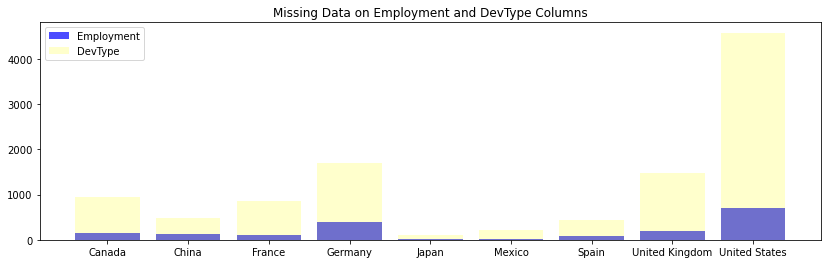

In [85]:
fig = plt.figure(figsize = (14, 4))
plt.bar(missing_data['Country'], missing_data['Employment'],color = 'Blue', alpha = 0.7)
#plt.bar(missing_data['Country'], res_total['RespondentID'], alpha = 0.2)
plt.bar(missing_data['Country'], missing_data['DevType'], color = 'Yellow', alpha = 0.20)
plt.legend(['Employment', 'DevType'])
plt.title('Missing Data on Employment and DevType Columns')
plt.show()

As we can see from the above plots, the data doesn’t appear to be missing for any country significantly more than any other. And the missing data is related to the number of respendents. Note that the United States and Germany have significantly more developers (on average) than the other countries, explaining why they have more missing data points.

Based on this analyzes we can categorize the missing data as MCAR (Missing Completely at Random). This means we can safely delete the rows that have missing data in these columns.

#### Deleting missing data from Employment and DevType columns 

In [94]:
df.dropna(subset = ['Employment', 'DevType'], inplace = True, how = 'any')

#### Plotting a bar chart to analyze types of developers by country 

C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\1029819065.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\1029819065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\1029819065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

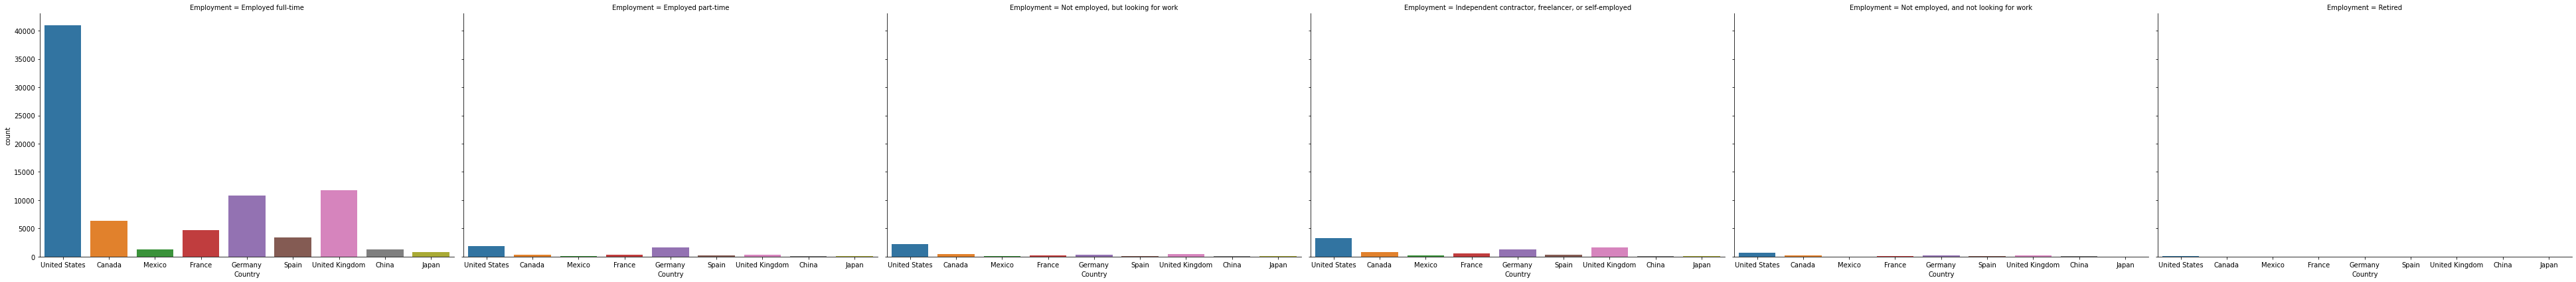

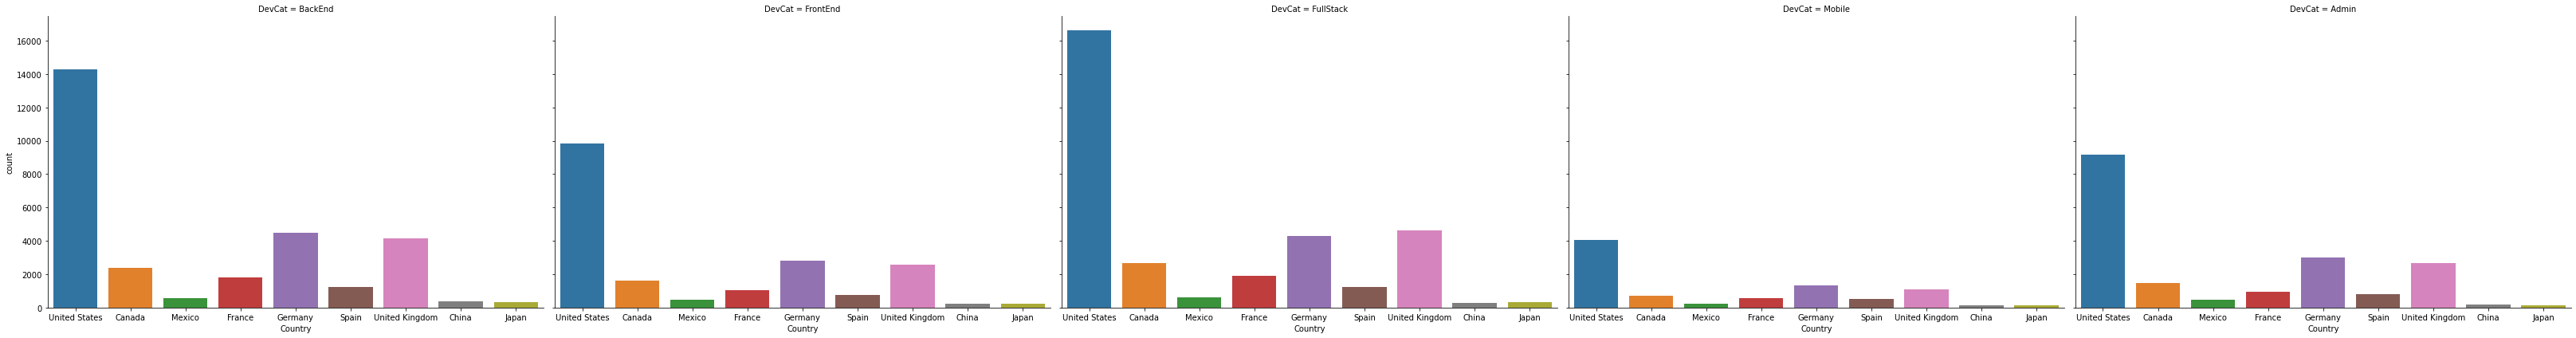

In [95]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
devdf.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

#### Investigate developer undergraduate majors

To analyze the developer undergraduate majors we would have to take a look at the UndergradMajor variable. 
But saw before that this column is missing 11% of the data. So let's take a look at the missing data to understand how we can handle it. 

#### Analyzing the data missing distribution  

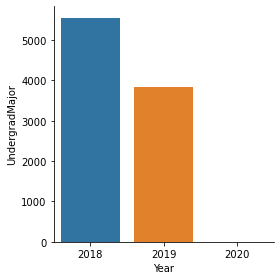

In [101]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

As we can see, 2020 has no missing data. Based on this we can use the NOCB to fill in the missing data. 

In [103]:
df = df.sort_values(['RespondentID', 'Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

#### Analyzing the major distribution for each year using bar chart 

C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\2377137730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\2377137730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\2377137730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

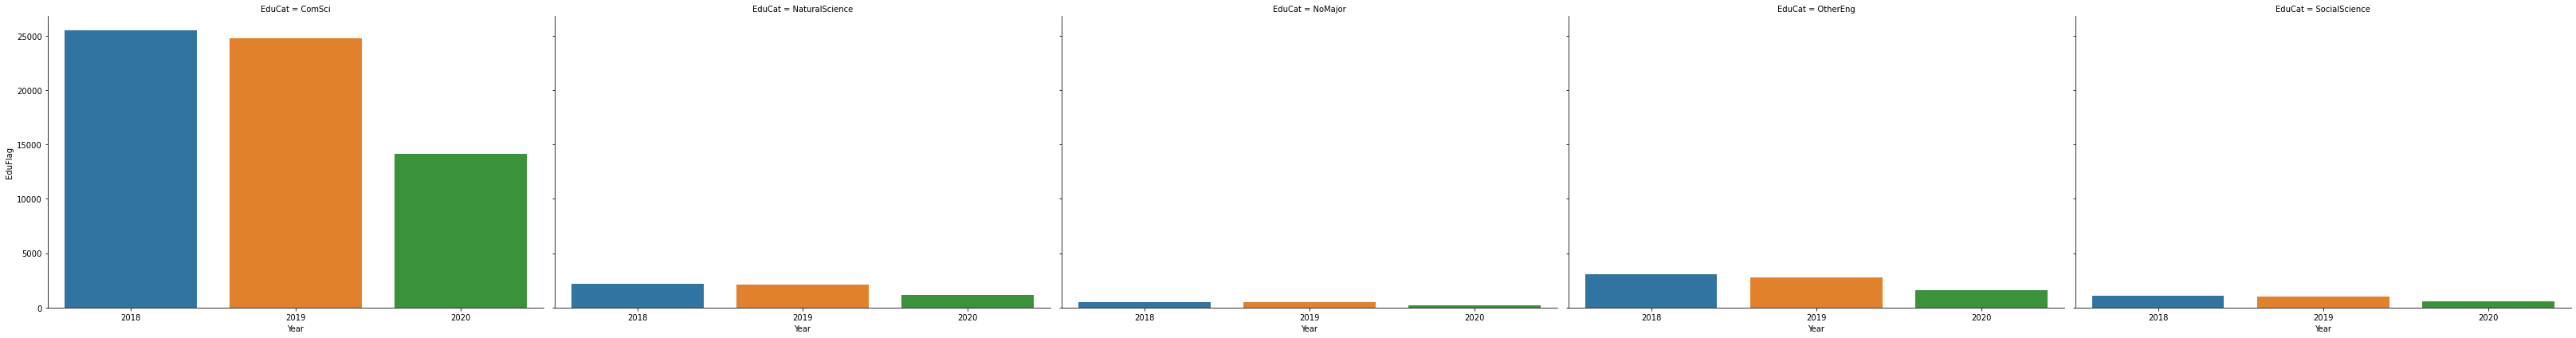

In [105]:
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

#### Analyzing the relationship between years of experience and compensation 

Exploring the data from the fileds 

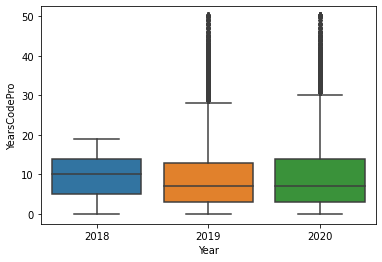

In [112]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro", data=compFields)
 


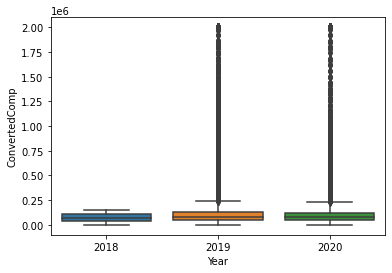

In [114]:
 E = sns.boxplot(x="Year", y="ConvertedComp", data=compFields)

Although the data show some outliears points for each column, the overall distribution is fairly consistent year-over-year. 
This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation. 
Since there is a clear trend with the data points, we decide the best method for filling in the missing data for these two columns is through Multiple Imputation.


In [117]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

Now that we filled in the missing data, we can use a boxplot to analyze the relation between salary and years of experience.

C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14968\2851799836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

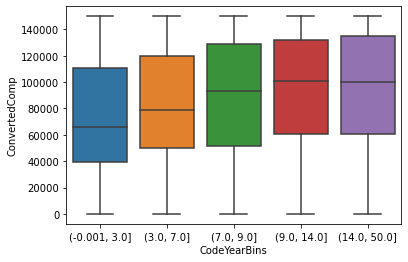

In [123]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

While there are high (and low) earning developers at every experience level, experience appears to correlate with compensation. The more experienced a developer was, the more (on average) they were compensated.